Number of unique colors
 27


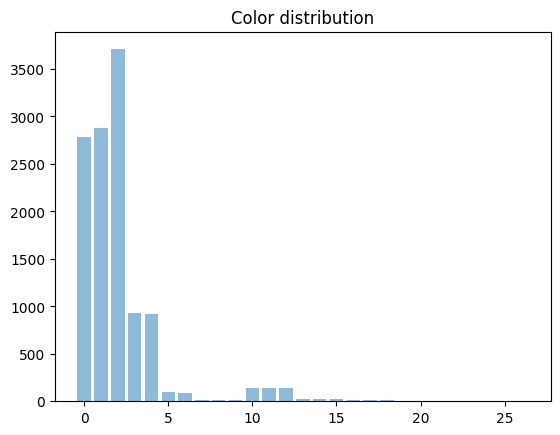

In [412]:
#%matplotlib inline
import matplotlib as mpl
import imageio
mpl.rcParams['figure.dpi']=100
import numpy as np
from imageio import imread
from skimage.transform import rescale
from skimage.color import rgb2lab, lab2rgb
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import types
from mpl_toolkits import mplot3d

uniqueColors = {}

def run(K = 4, image_width = 16):
	# Prepare image
	image_raw = imageio.v2.imread('image_files/gates.jpg')
	image = rescale(image_raw, image_width/image_raw.shape[0], mode='reflect', channel_axis=2, anti_aliasing=True)
	X = rgb2lab(image).reshape(-1, 3)

	def cluster_assignments(X, Y):
		return np.argmin(euclidean_distances(X,Y), axis=1)

	centers = np.array([X.mean(0) + (np.random.randn(3)/10) for _ in range(K)])
	y_kmeans = cluster_assignments(X, centers)

	# repeat estimation a number of times (could do something smarter, like comparing if clusters change)
	for i in range(30):
		# assign each point to the closest center
		y_kmeans = cluster_assignments(X, centers)

		# move the centers to the mean of their assigned points (if any)
		for i, c in enumerate(centers):
			points = X[y_kmeans == i]
			if len(points):
				centers[i] = points.mean(0)

	for c in centers:
		name = ''.join("{0}|".format(n) for n in c)
		if (name in uniqueColors.keys()):
			uniqueColors[name] = uniqueColors[name]+1
		else:
			uniqueColors[name] = 1

for i in range(0, 4000):
	run(K = 3)

print("Number of unique colors")
print("", len(uniqueColors))
#for c in uniqueColors:
#	print(c, uniqueColors[c])

y_pos = np.arange(len(objects))

plt.bar(range(0, len(uniqueColors)), uniqueColors.values(), align='center', alpha=0.5)
#plt.xticks(uniqueColors.values(), uniqueColors.keys())
#plt.ylabel('Usage')
plt.title('Color distribution')

plt.show()